# Sentiment Analysis with Reuters Dataset

* Reuters Dataset published by Reuters in 1986.
* Dataset includes short newswires and their 46 different topics.

In [ ]:
from keras.datasets import reuters
import numpy as np
from keras import models, layers
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for key, value in word_index.items()])
decoded_newswire = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
print('Train data shape:', train_data.shape)
print('Test data shape:', test_data.shape)
print('Number of lables:', len(np.unique(train_labels)))

Train data shape: (8982,)
Test data shape: (2246,)
Number of lables: 46


* As we can see, we have 8982 train, 2246 test data and 46 unique labels.
* Totally we have 11228 sample

Similarly in Imdb dataset, let's vectorize the sequences

In [ ]:
def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

1000 samples are splitted as validation data

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### Creating and Training Model:

* 2 Densely connected layer with 64 units and `tanh` activation function used for this dataset
* Since we have 46 label output layer has 46 unit with `softmax` activation function
* In this case, `adam` used as optimizer

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 23ms/step - loss: 2.9092 - accuracy: 0.4400 - val_loss: 2.0983 - val_accuracy: 0.5400
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.7484 - accuracy: 0.6096 - val_loss: 1.5326 - val_accuracy: 0.6400
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.2858 - accuracy: 0.7167 - val_loss: 1.2396 - val_accuracy: 0.7240
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.9857 - accuracy: 0.7917 - val_loss: 1.0868 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.7797 - accuracy: 0.8490 - val_loss: 0.9905 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6247 - accuracy: 0.8839 - val_loss: 0.9257 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5044 - accuracy: 0.9070 - val_loss: 0.8866 - val_accuracy: 0.8160
Epoch 8/20
16

In [ ]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9757 - accuracy: 0.7939


[0.9757151007652283, 0.7938557267189026]

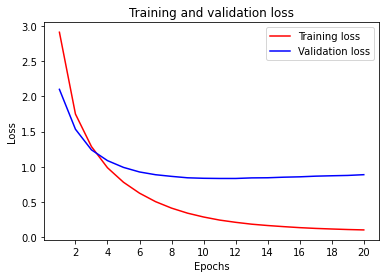

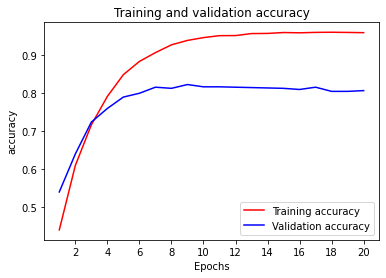

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss)+1)
x_scale = range(2, len(loss)+1, 2)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.xticks(x_scale)
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.clf()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.xticks(x_scale)
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

As you can see, validation accuracy stops improving roughly after 9th epoch, let's set the epoch as 9 for next model and see the result

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 0s 23ms/step - loss: 2.8432 - accuracy: 0.4907 - val_loss: 2.0154 - val_accuracy: 0.5550
Epoch 2/9
16/16 [==============================] - 0s 14ms/step - loss: 1.6899 - accuracy: 0.6209 - val_loss: 1.4950 - val_accuracy: 0.6560
Epoch 3/9
16/16 [==============================] - 0s 13ms/step - loss: 1.2537 - accuracy: 0.7243 - val_loss: 1.2193 - val_accuracy: 0.7270
Epoch 4/9
16/16 [==============================] - 0s 13ms/step - loss: 0.9692 - accuracy: 0.7992 - val_loss: 1.0667 - val_accuracy: 0.7770
Epoch 5/9
16/16 [==============================] - 0s 13ms/step - loss: 0.7634 - accuracy: 0.8525 - val_loss: 0.9719 - val_accuracy: 0.8050
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.6104 - accuracy: 0.8871 - val_loss: 0.9110 - val_accuracy: 0.8130
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.4930 - accuracy: 0.9124 - val_loss: 0.8675 - val_accuracy: 0.8180
Epoch 8/9
16/16 [===

In [ ]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9054 - accuracy: 0.7921


[0.9054484963417053, 0.7920747995376587]

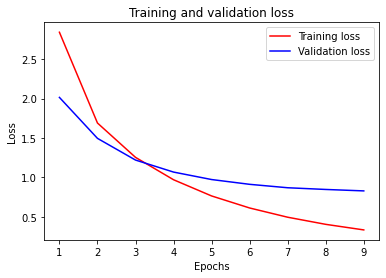

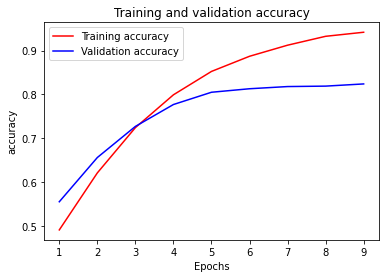

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss)+1)
x_scale = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.xticks(x_scale)
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.clf()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.xticks(x_scale)
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Now, we got slightly better validation accuracy within a few epochs

### A different way to handle the labels and the loss

* We can also directly use labels as numerical values without using their one-hot representations.

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(46, activation='softmax'))

# we should change the loss function from categorical to sparse_categorical for integer values
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 0s 21ms/step - loss: 2.8502 - accuracy: 0.4838 - val_loss: 2.0121 - val_accuracy: 0.5500
Epoch 2/9
16/16 [==============================] - 0s 14ms/step - loss: 1.6794 - accuracy: 0.6248 - val_loss: 1.4924 - val_accuracy: 0.6570
Epoch 3/9
16/16 [==============================] - 0s 13ms/step - loss: 1.2320 - accuracy: 0.7204 - val_loss: 1.2234 - val_accuracy: 0.7280
Epoch 4/9
16/16 [==============================] - 0s 14ms/step - loss: 0.9492 - accuracy: 0.8012 - val_loss: 1.0637 - val_accuracy: 0.7760
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.7513 - accuracy: 0.8557 - val_loss: 0.9665 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6007 - accuracy: 0.8903 - val_loss: 0.9040 - val_accuracy: 0.8190
Epoch 7/9
16/16 [==============================] - 0s 12ms/step - loss: 0.4853 - accuracy: 0.9148 - val_loss: 0.8632 - val_accuracy: 0.8210
Epoch 8/9
16/16 [===

In [ ]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 0.9049 - accuracy: 0.7925


[0.9048596620559692, 0.7925200462341309]

I strongly recommend you to try different model settings yourself for the sake of practicing. Choosing different optimizer, activation functions or adding dropout to prevent overfitting are only ones of the such options.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 0s 19ms/step - loss: 2.5855 - accuracy: 0.5075 - val_loss: 1.7152 - val_accuracy: 0.6140
Epoch 2/9
16/16 [==============================] - 0s 13ms/step - loss: 1.4430 - accuracy: 0.6868 - val_loss: 1.2745 - val_accuracy: 0.7120
Epoch 3/9
16/16 [==============================] - 0s 13ms/step - loss: 1.0663 - accuracy: 0.7749 - val_loss: 1.0887 - val_accuracy: 0.7700
Epoch 4/9
16/16 [==============================] - 0s 13ms/step - loss: 0.8407 - accuracy: 0.8320 - val_loss: 0.9781 - val_accuracy: 0.7970
Epoch 5/9
16/16 [==============================] - 0s 13ms/step - loss: 0.6793 - accuracy: 0.8663 - val_loss: 0.9090 - val_accuracy: 0.8100
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.5584 - accuracy: 0.8954 - val_loss: 0.8591 - val_accuracy: 0.8190
Epoch 7/9
16/16 [==============================] - 0s 13ms/step - loss: 0.4683 - accuracy: 0.9144 - val_loss: 0.8258 - val_accuracy: 0.8220
Epoch 8/9
16/16 [===

In [ ]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.8572 - accuracy: 0.8045


[0.8571658134460449, 0.8045414090156555]

As you can see, setting first layer unit as 128 and replacing second layer with Dropout with 0.5 probability slightly increased the test accuracy.